# Simple Linear Regression

In this R Jupyter notebook, we go through the code implementation for a simple linear regression analysis. In particular, we are interested in whether we can explain or predict midterm 2 scores by midterm 1 scores.

## 1. Loading the data

If the data size is not large, it may be convenient to make two data vectors manually as follows.

In [1]:
midterm1 <- c(23, 22.5, 21.5, 21.25, 13, 25, 14.5, 20, 18, 18, 19.5, 
              25, 23, 19, 24, 20, 24, 24, 18.5, 18, 16, 21.85, 25, 19.5) # explanatory variable
midterm2 <- c(21.5, 20, 21, 21.32, 12.7, 25, 18.5, 24, 15.5, 18, 23, 23, 
              17.9, 13.5, 22, 22.5, 21.5, 18.5, 18.5, 20, 17.5, 20.5, 16.5, 20) # response variable

If the data size is not small enough for a manual input, we have to load the data. The following is an example of loading the data "midterm.csv" from my desktop folder. The data file "midterm.csv" contains two columns as follows.

<img src="data.png" width="150" />

Note that the first row starts with the variable names. This feature will be important later. 

Since this data file is in the desktop folder, we have to set up a working directory where the data file exists.

In [2]:
setwd("~/Desktop/")

For Window users, the following code will be useful.

setwd("C:/Users/hyungsuktak/Desktop/")

Now let us load the data from the desktop folder.

In [3]:
midterm <- read.csv("midterm.csv", header = TRUE)

The first argument must be the file name, and the next argument "header = TRUE" is to tell R that the first row of the data file contains the variable names. If the data file is a .txt file, then the following code will be used instead.

midterm <- read.table("midterm.txt", header = TRUE)

To check whether the data are correctly loaded, type the object name.

In [4]:
midterm

midterm1,midterm2
<dbl>,<dbl>
23.00,21.50
22.50,20.00
21.50,21.00
21.25,21.32
13.00,12.70
25.00,25.00
14.50,18.50
20.00,24.00
18.00,15.50


To avoid any mistake, it is better to check whether the first row is correctly loaded. In this case, the first row correctly starts with (23, 21.5).
 
Next, we designate each column of the data to an object, as we input manually in the beginning.

In [5]:
midterm1 <- midterm[, 1]
midterm2 <- midterm[, 2]

The bracket [, 1] above can be interpreted as "all rows in the first column", and [, 2] as "all rows in the second column".

Now the data are loaded, and we are ready to conduct a simple linear regression analysis.

## 2. Visualizing the data

In a simple linear regression analysis, the most important plot is a scatter plot of $Y$ on $X$. In R, the plot can be drawn as follows.

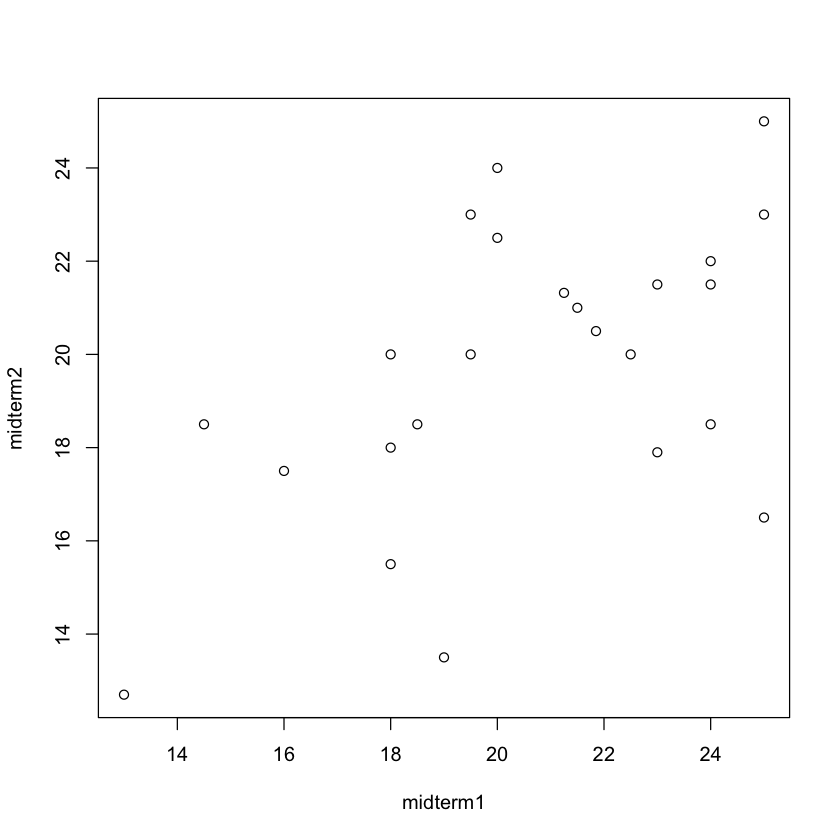

In [6]:
plot(midterm1, midterm2)

The variable in the first argument is used to represent the horizontal axis, and the one in the second argument is to denote the vertical axis. This plot may reveal whether a linear relationship (association, not causation) exists between two variables. Roughly speaking, we can say that a linear relationship exists if $Y$ tends to increase when $X$ increases (positive trend) or when $X$ decreases (negative trend).

## 3. Fitting a simple linear regression model

A linear trend identified in the scatter plot justifies using a simple linear regression model. 

In [7]:
res <- lm(midterm2 ~ midterm1)

The code above fits the following simple linear regression model and saves the output in the object "res":

$$
Y_i=\beta_0+\beta_1x_i+\epsilon_i,
$$

where $Y_i$ and $x_i$ are the $i$-th person's midterm 2 and 1 scores, respectively, and $\epsilon_i\stackrel{\textrm{iid}}{\sim}N(0, \sigma^2)$. In this model, $\beta_0, \beta_1$, and $\sigma^2$ are unknown parameters.

To see the fit, let's type the following line.

In [8]:
summary(res)


Call:
lm(formula = midterm2 ~ midterm1)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4014 -1.1872  0.4097  1.3798  4.6055 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   9.5323     3.5192   2.709  0.01283 * 
midterm1      0.4931     0.1688   2.921  0.00791 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.707 on 22 degrees of freedom
Multiple R-squared:  0.2794,	Adjusted R-squared:  0.2467 
F-statistic: 8.532 on 1 and 22 DF,  p-value: 0.007914


First of all, we check whether the the proposed model is meaningful (or statistically significant) overall. The $F$-test checks whether the explanatory variable (midterm 1) is useful for explaning  variability of the response variable (midterm 2) in the proposed linear regression model. The result of the $F$-test on the bottom ($p$-value = 0.007914 < 0.05) shows that we can reject "$H_0$: The proposed model is not meaningful" at the 5% significance level ($\alpha=0.05$). 

The model explains 27.94% of the midterm2 variability, considering the value of $R^2$ (see $\texttt{Multiple R-squared}$ above). We will learn "$\texttt{Adjusted R-squared}$" in the next packet for multiple linear regression.

At $\alpha=0.05$, both intercept $\beta_0$ and slope $\beta_1$ are significantly different from zero based on their $t$-tests because both $p$-values (0.01283 and 0.00791) are smaller than $\alpha=0.05$. We interpret $\hat{\beta}_1$ as a change of the average midterm 2 score with a unit increase in midterm 1 score. That is, the average midterm 2 score increases by 0.4931 for every additional one point in the midterm 1 score.

## 4. Diagnosing the fitted model

It is always desirable to diagnose the fitted model to see whether the model assumptions are supported by the data. The key assumptions of the linear regression model are represented in the error terms.

$$
\epsilon_i\stackrel{\textrm{iid}}{\sim}N(0, \sigma^2)
$$

That means, we assume (1) independence among the measurements, (2) linearity (i.e., $E(\epsilon_i)=0$), (3) Normality, and (4) constant variance (i.e., $Var(\epsilon_i)=\sigma^2$ for all $i$). The following code is mainly used for a model check in R.

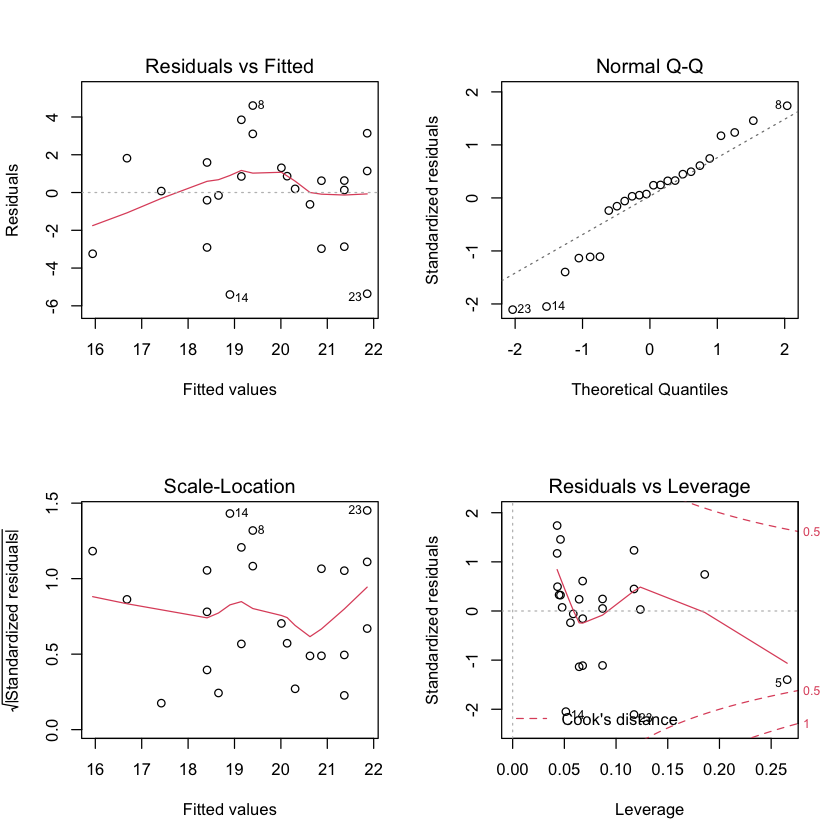

In [9]:
par(mfrow = c(2, 2))
plot(res)

The function "par" adjust the plot setting. The first argument "mfrow = c(2, 2)" tells R to divide the plot into 2 by 2 panels, and to fill out each panel row by row (the first row with two panels will be filled out first, and then next row with two panels will be filled out).

The function "plot(res)" returns four plots (which will be displayed in the 2 by 2 panels); a residual plot (top-left, residuals over fitted values), QQ-plot (top-right), scale-location plot (bottom-left), and a plot for checking influence of each observation (bottom-right, Cook's D over leverage).

The residual plot on the top-left panel is mainly used to check the independence and linearity. If there is no clear pattern in this plot, such as quadratic  or other non-linear patterns, then we consider that the two assumptions are satisfactory.

The QQ-plot on the top-right panel can be used to check the Normality. If dots are closely plotted located near the dotted line, we can conclude that the residuals seem Normally distributed. Note that the dots below (above) the dotted line on the smaller theoretical quantiles (i.e., on the bottom-left corner) imply that the residual distribution has the fatter (thinner) left tail than a Normal distribution. Also, the dots above (below) the dotted line on the larger theoretical quantiles (i.e., on the top-right corner) mean that the residual distribution has the fatter (thinner) right tail than a Normal distribution.

The scale-location plot is used to check the constant variance. If the dots are evenly spread within some horizontal boundaries (without any evidence of increasing or decreasing spread), then we consider it as evidence of constant variance.

The last plot shows whether there are influential observations that unduly affect the paramter estimation. Any dots outside the boundary of Cook's distance 0.5 or 1 will be considered as influential observations. Removing such influential points will significantly change the fit. 

Each panel shows some observation numbers, e.g., 8, 14, 23. We have to pay attention to them because they can be the potential reasons for violating the assumptions. Let us investigate these three observations one by one. Observation 8 is a person whose midterm 2 score  increased to 24 from midterm 1 score 20. Observation 14 is a person whose midterm 2 score  decreased to 13.5 from midterm 1 score 19. Observation 23 is a person whose midterm score decreased to 16.5 from midterm 1 score 25. Overall, we can learn that these three people are those who received quite different midterm 2 scores, compared to their midterm 1 scores.

Overall, we think that the model fit is satisfactory, considering that the sample size is not quite large. The red flags on three observaiotns (8, 14, 23) may be due to the small sample size ($n=24$). This is because it might be possible that these three observations would not be flagged if we gathered more data points.


## 5. Making inferences

We can draw the fitted line (i.e., the least square line) on the scatter plot, using the following code.

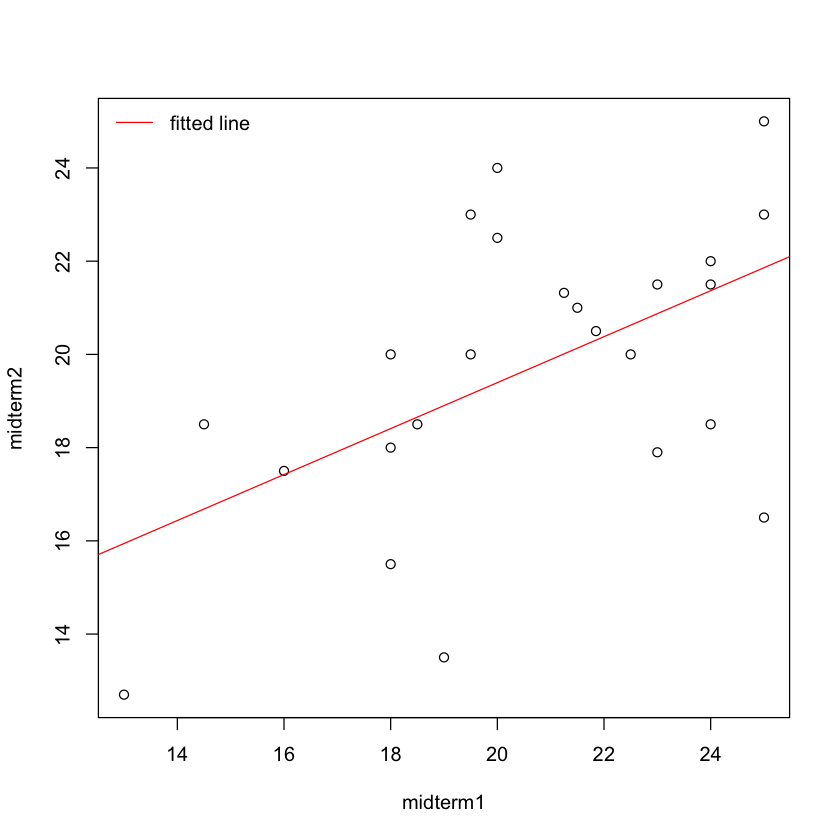

In [10]:
plot(midterm1, midterm2)
abline(res, col = "red")
legend("topleft", "fitted line", col = "red", lty = 1, bty = "n")

The function "abline" adds a designated line in the plot. If we put the object containing the regression output into this function, it draws the fitted line.

The function "legend" adds a legend at the designated location ("topleft"). The second argument specifies the description, the third argument "col" defines the color, the fourth argument "lty" indicates the line type ("1" is a solid line), and the last argument "bty" specifies the boundary of the legend ("n" means no boundary).

We can compute $100(1-\alpha)$% confidence intervals for the two regression coefficients as follows. We set $\alpha=0.05$.

In [11]:
confint(res, level = 0.95)

,2.5 %,97.5 %
(Intercept),2.2339963,16.8305742
midterm1,0.1430065,0.8432115


The function "confint" returns 95% confidence intervals of regression coefficients with a designated confidence level. If you want to see only three decimal places, the following code will be useful.

round(confint(res, level = 0.95), 3)

The function "round" displays numeric values with the designated number of decimal places.

The first row shows a 95% confidence interval for $\beta_0$, and the second row exhibits that for $\beta_1$. That means, we are 95% confident that the true value of $\beta_0$ is in the interval (2.234, 16.831), and that the true value of $\beta_1$ is in the interval (0.143, 0.843). More rigorously, each interval is one of hypothetical intervals that can be computed by different realizations of the data, where 95% of the hypothetical intervals are expected to contain the true parameter value.

We can also compute a 95% confidence interval for the value on true linear line at some specific value of midterm 1, i.e., $E(\hat{Y}_\ast)=\beta_0+\beta_1x_\ast$. Let us calculate such an interval at $x_\ast=25$.

In [12]:
predict(res, newdata = data.frame(midterm1 = 25), interval = "confidence", level = 0.95)

,fit,lwr,upr
1,21.86001,19.93646,23.78356


The function "predict" returns confidence intervals for the values on the true regression line or prediction intervals for some designated values $x_\ast$'s. The first argument is the object containing the fitted result, the second argument "newdata" sets up a data set on which we compute intervals, the third argument "interval" designates whether we compute intervals for the values on the true regression line or intervals for predictions; "confidence" returns the former and "prediction" shows the latter.

The fitted value $\hat{y}_\ast$ (i.e., the value on the fitted least square line) at $x_\ast=25$ is 21.860, which is an estimate for the value on the true regression line at $x_\ast=25$. A 95% confidence interval for $\beta_0+\beta_1x_\ast$ is (19.936, 23.784). 

If we collect these lower and upper bounds on a fine grid of values of $x_\ast$ between $\min(x)$ and $\max(x)$ (to avoid extrapolation), these form a 95% confidence band. The following codes will guide you to the confidence band.

In [13]:
midterm1.range <- seq(min(midterm1), max(midterm1), by = 0.05)

The function "seq" makes a numeric vector containing values increasing from the minimum value of $\texttt{midterm1}$ to the maximum value of $\texttt{midterm1}$ by 0.05. We can also designate a number of equally-spaced values on the grid by replacing "$\texttt{by} = 0.05$" with "$\texttt{length.out} = 1000$".

In [14]:
conf.band <- predict(res, newdata = data.frame(midterm1 = midterm1.range), interval = "confidence", level = 0.95)
head(conf.band)

,fit,lwr,upr
1,15.94270,13.04960,18.83580
2,15.96736,13.09032,18.84440
3,15.99201,13.13102,18.85300
4,16.01667,13.17171,18.86163
5,16.04132,13.21238,18.87027
6,16.06598,13.25303,18.87893


This time, the function "predict" returns a matrix, containing fitted values and 95% confidence intervals computed on the grid of values of midterm 1. 

The function "head" displays only the first 6 rows of the given matrix.

Now we can draw a 95% confidence band as follows.

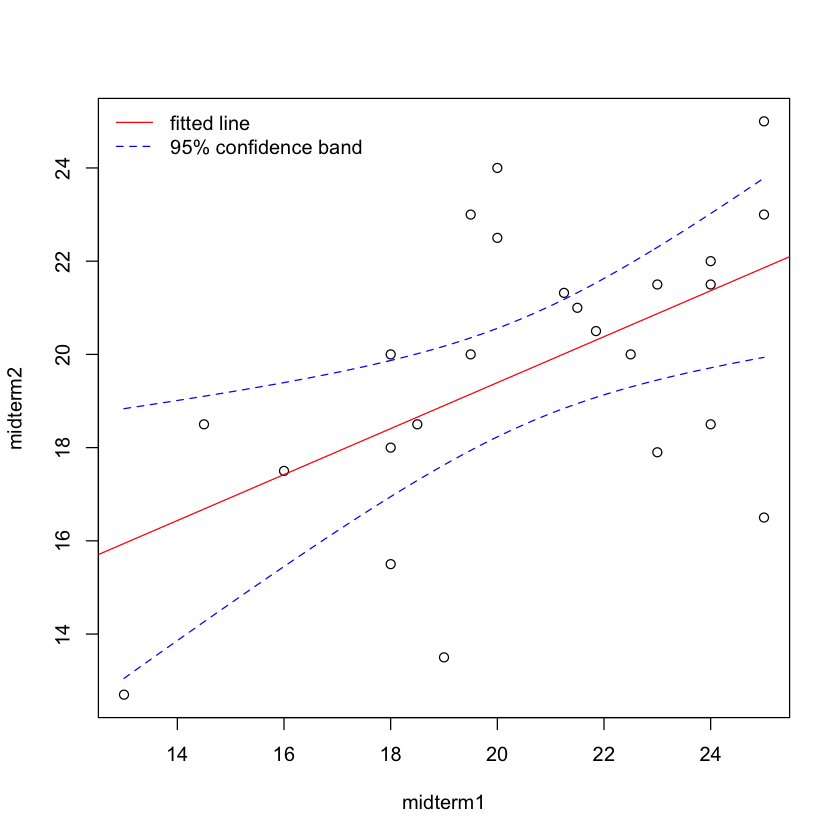

In [15]:
plot(midterm1, midterm2)
abline(res, col = "red")
lines(midterm1.range, conf.band[, 2], col = "blue", lty = 2)
lines(midterm1.range, conf.band[, 3], col = "blue", lty = 2)
legend("topleft", c("fitted line", "95% confidence band"), col = c("red", "blue"), lty = c(1, 2), bty = "n")

First, we use the function "line" to draw a curve for lower bounds. The first argument is the grid of values of midterm 1, and the second argument is a vector for the corresponding lower bounds. Note that the second column of the object "$\texttt{conf.band}$" contains the lower bounds. The function "line" draws a line connecting these dots, i.e., a curve for the lower bounds. The third argument defines the color of the curve, and the last argument "lty" defines the type of the curve ("2" is a dashed curve and "3" is a dotted curve). 

Similarly, we draw a curve for the upper bounds.

If we want to display a legend with several objects, we make vectorize inputs via "c".

Let us change our gear to a prediction and its interval at $x_\ast=25$.

In [16]:
predict(res, data.frame(midterm1 = 25), interval = "prediction", level = 0.95)

,fit,lwr,upr
1,21.86001,15.92489,27.79513


We can also superimpose a 95% prediction band in the figure above, using the code below.

In [17]:
pred.band <- predict(res, newdata = data.frame(midterm1 = midterm1.range), interval = "prediction", level = 0.95)
head(pred.band)

,fit,lwr,upr
1,15.94270,9.626401,22.25900
2,15.96736,9.658399,22.27632
3,15.99201,9.690356,22.29367
4,16.01667,9.722273,22.31106
5,16.04132,9.754150,22.32850
6,16.06598,9.785986,22.34597


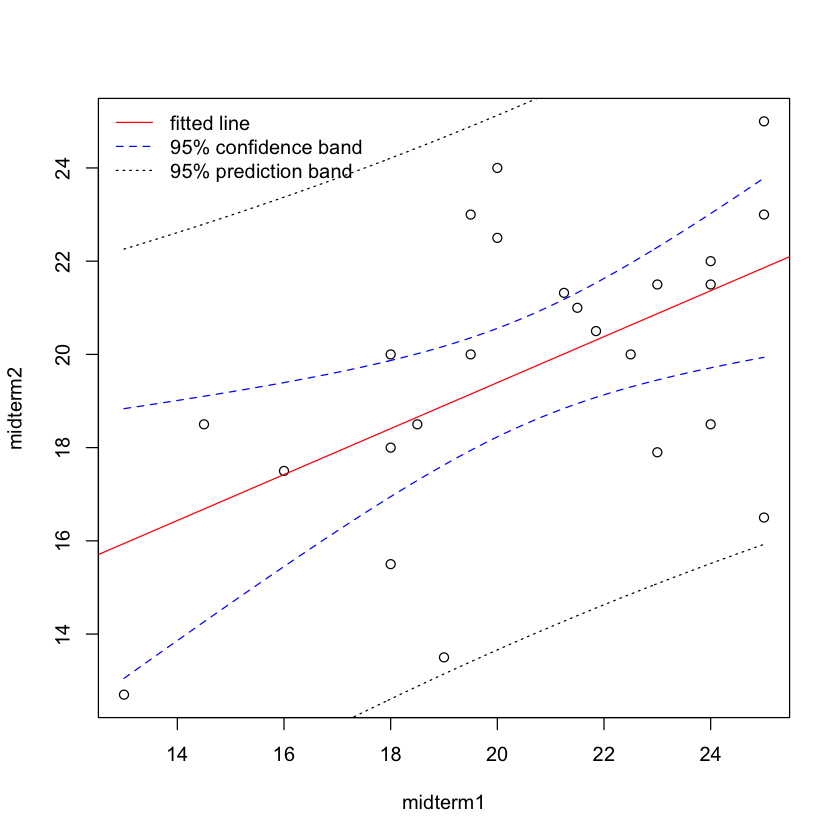

In [18]:
plot(midterm1, midterm2)
abline(res, col = "red")
lines(midterm1.range, conf.band[, 2], col = "blue", lty = 2)
lines(midterm1.range, conf.band[, 3], col = "blue", lty = 2)
lines(midterm1.range, pred.band[, 2], col = "black", lty = 3)
lines(midterm1.range, pred.band[, 3], col = "black", lty = 3)
legend("topleft", 
       c("fitted line", "95% confidence band", "95% prediction band"), 
       col = c("red", "blue", "black"), 
       lty = c(1, 2, 3), bty = "n")